In [116]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore", category=ConvergenceWarning)

## problem 1

In [15]:
df = pd.read_csv('movie.csv', encoding='latin1')

In [16]:
df

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,Sweet Nothing (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1660,Mat' i syn (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1661,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1662,You So Crazy (1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1

**Calculate the number of movies included in each genre.**

In [19]:
genre_counts = {}
for column in df.columns[1:]: 
    genre_counts[column] = df[column].sum()

In [29]:
genre_counts

{'Unknown': 2,
 'Action': 249,
 'Adventure': 133,
 'Animation': 42,
 'Childrens': 120,
 'Comedy': 502,
 'Crime': 107,
 'Documentary': 50,
 'Drama': 716,
 'Fantasy': 22,
 'FilmNoir': 24,
 'Horror': 90,
 'Musical': 56,
 'Mystery': 60,
 'Romance': 244,
 'SciFi': 100,
 'Thriller': 248,
 'War': 71,
 'Western': 27}

**Which genre includes the most movies, and which includes the fewest?**

In [21]:
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

In [31]:
sorted_genres[0][0] # most

'Drama'

In [32]:
sorted_genres[-1][0] # fewest

'Unknown'

**Then, calculate the average number of genres a movie belongs to.**

In [27]:
genre_count_per_movie = df.iloc[:, 1:].sum(axis=1)
average_genres = genre_count_per_movie.mean()

In [33]:
average_genres

1.7205528846153846

**Identify the movie(s) that belong to the highest number of genres.**

In [34]:
max_genres = genre_count_per_movie.max()
movies_with_max_genres = df[genre_count_per_movie == max_genres]

In [40]:
for idx, row in movies_with_max_genres.iterrows():
    print(row['Title'])

Empire Strikes Back, The (1980)
Transformers: The Movie, The (1986)
Kid in King Arthur's Court, A (1995)


**How many genres does this movie belong to?**

In [42]:
max_genres

6

In [44]:
for idx, row in movies_with_max_genres.iterrows():
    print(row['Title'])
    for genre in df.columns[1:]: 
        if row[genre] == 1:
            print(f"- {genre}")

Empire Strikes Back, The (1980)
- Action
- Adventure
- Drama
- Romance
- SciFi
- War
Transformers: The Movie, The (1986)
- Action
- Animation
- Childrens
- SciFi
- Thriller
- War
Kid in King Arthur's Court, A (1995)
- Adventure
- Childrens
- Comedy
- Fantasy
- Romance
- SciFi


### 2

**Use hierarchical clustering to group movies with similar genres.**

#### (a)

**Perform clustering using three linkage criteria: average, complete, and single linkage. Visualize the dendrogram for each case.**

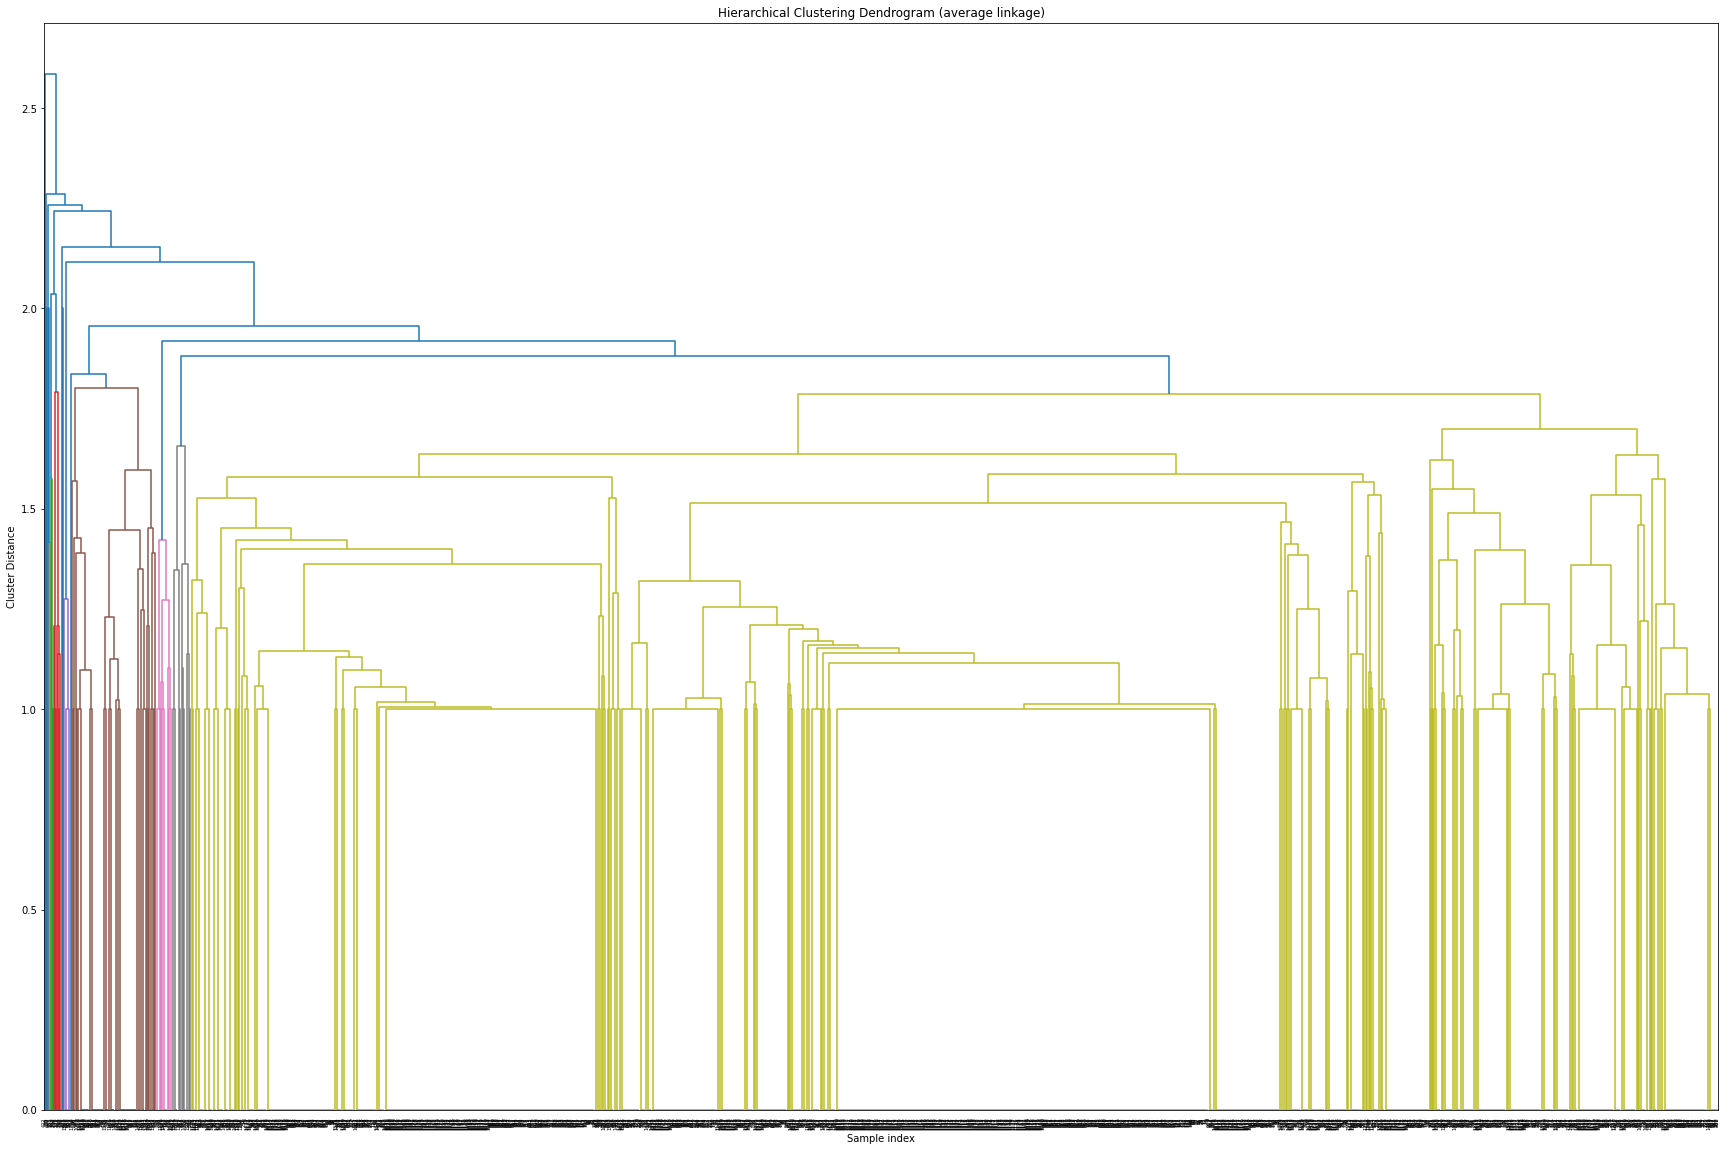

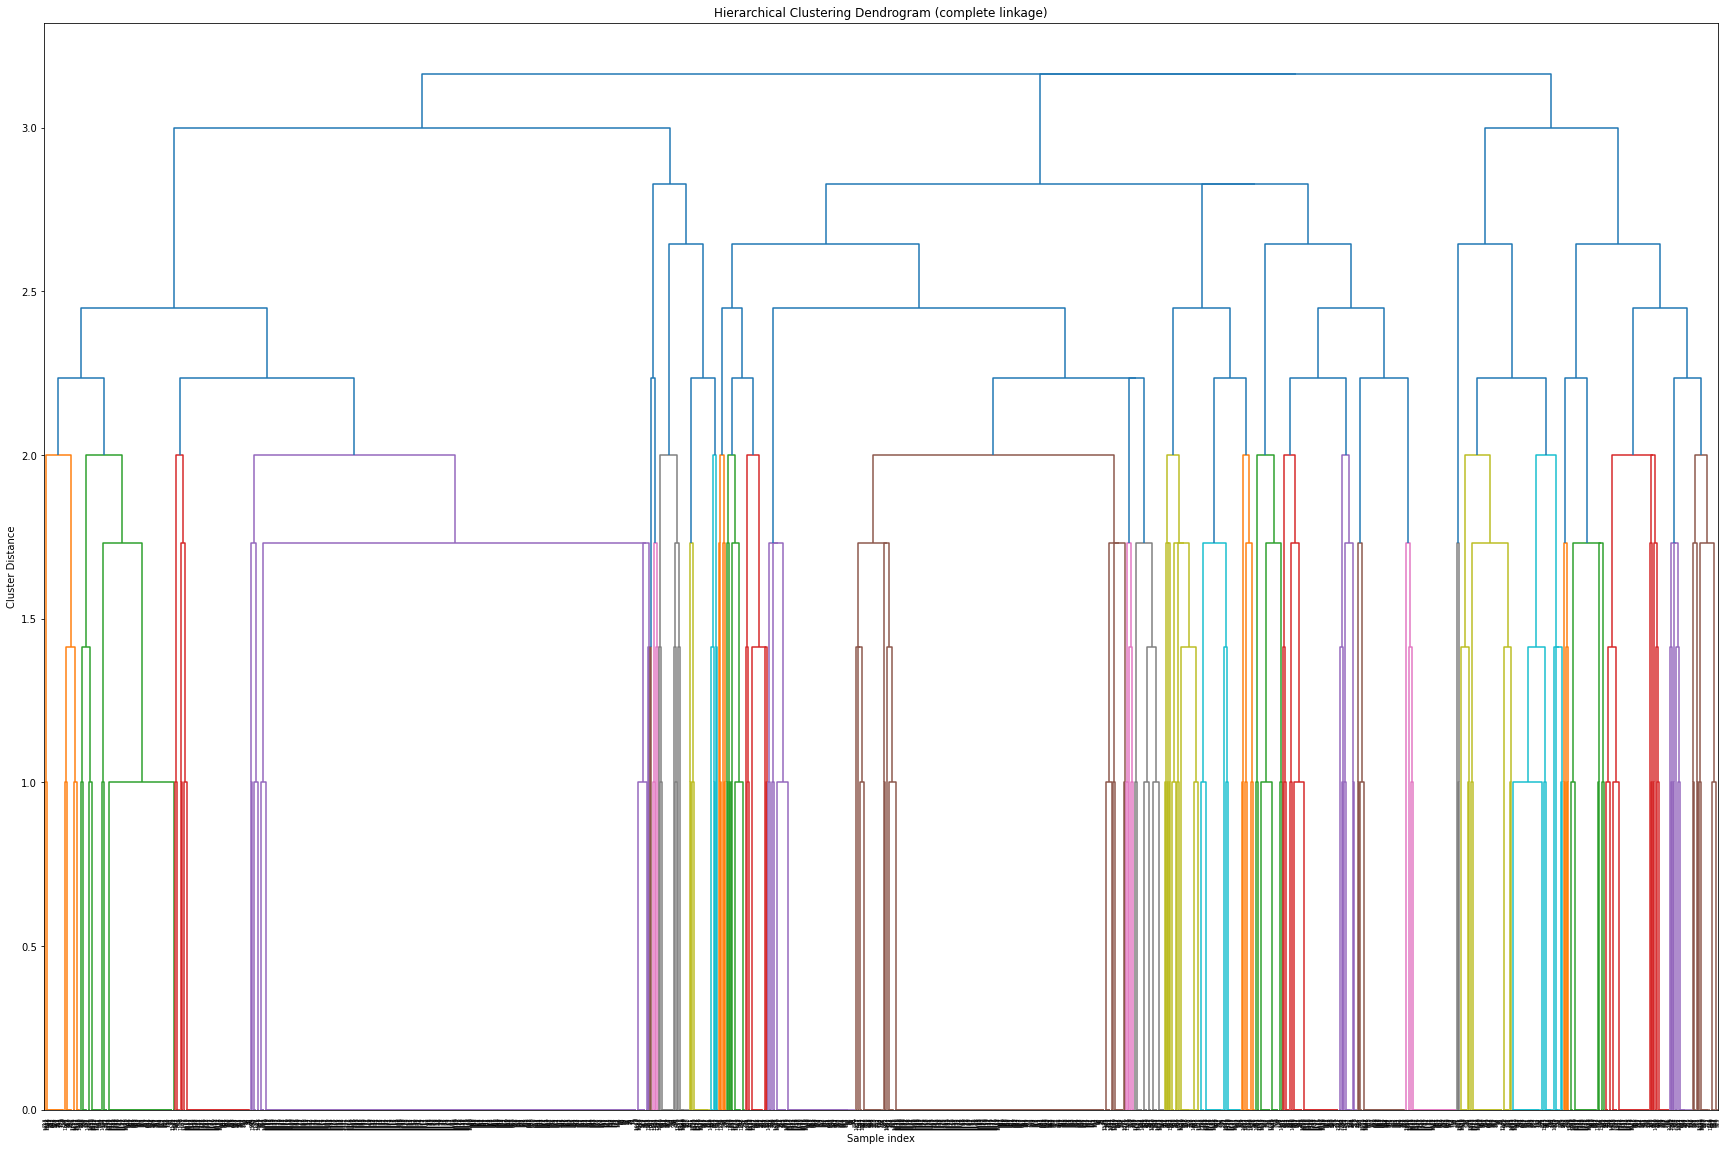

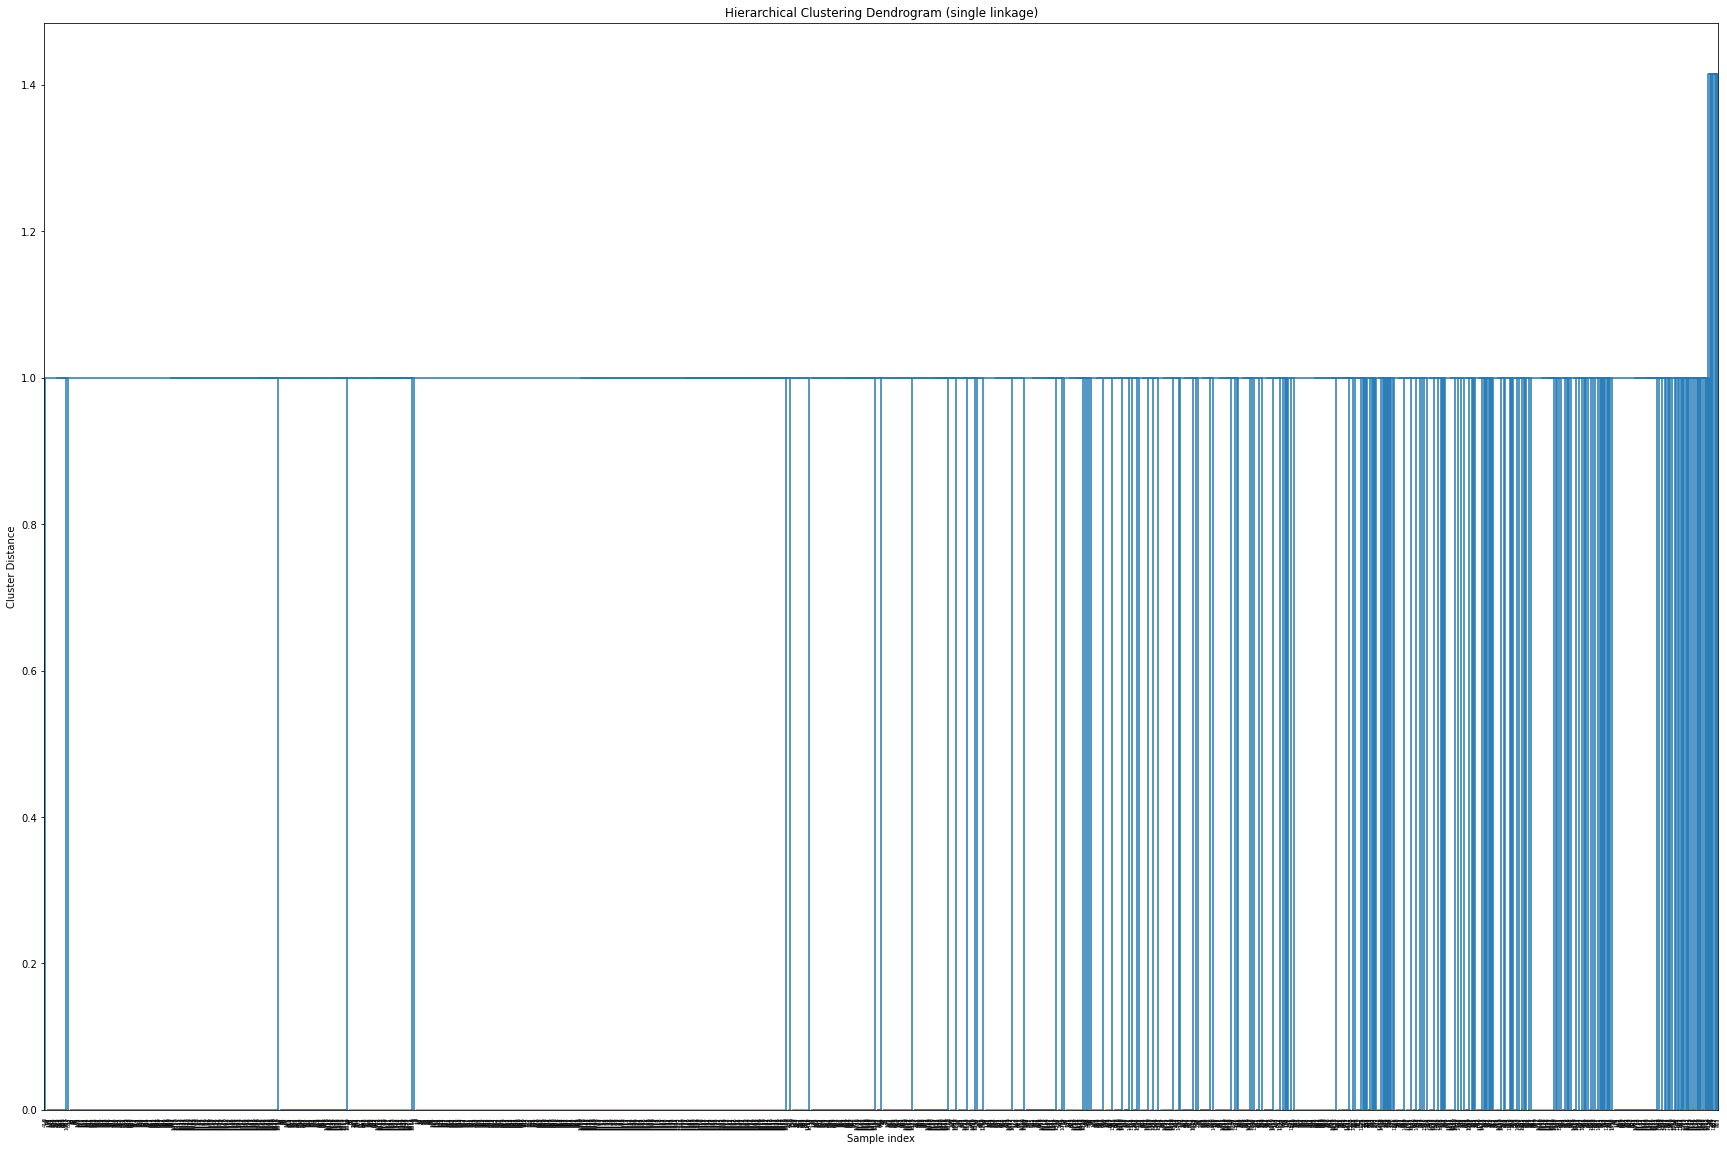

In [53]:
def plot_dendrogram(linkage_method):
    counts = np.zeros(agg.children_.shape[0])
    n_samples = len(agg.labels_)
    for i, merge in enumerate(agg.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])

    plt.figure(figsize=(30, 20))
    dendrogram(linkage_matrix)
    
    plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Cluster Distance')
    plt.show()

X = df.iloc[:, 1:].values  
for linkage_method in ['average', 'complete', 'single']:
    agg = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0,
        linkage=linkage_method
    )
    agg = agg.fit(X)
    plot_dendrogram(linkage_method)

#### (b)

**Compare the shapes of the three dendrograms. What characteristics do they exhibit?**

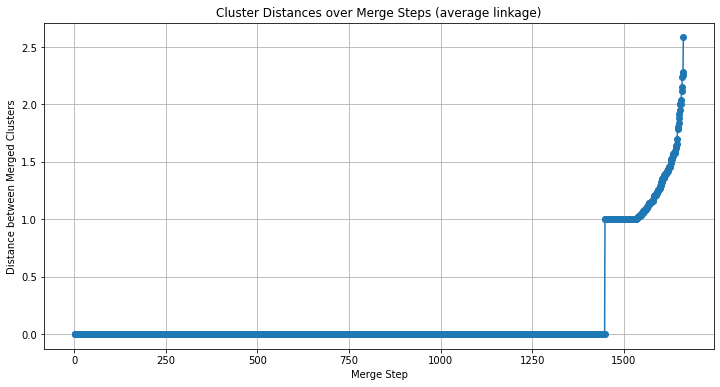

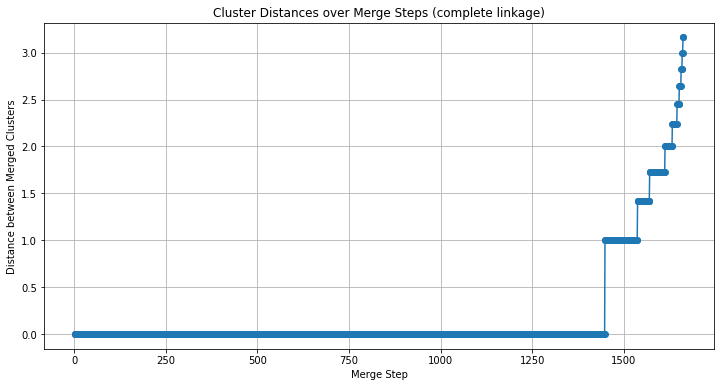

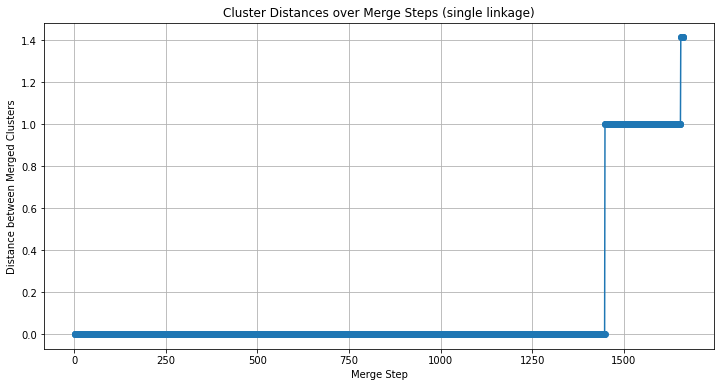

In [59]:
def analyze_cluster_distances(linkage_method, X):
    agg = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0,
        linkage=linkage_method
    )
    agg = agg.fit(X)
    
    distances = agg.distances_
    
    merge_steps = np.arange(1, len(distances) + 1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(merge_steps, distances, marker='o')
    plt.title(f'Cluster Distances over Merge Steps ({linkage_method} linkage)')
    plt.xlabel('Merge Step')
    plt.ylabel('Distance between Merged Clusters')
    plt.grid(True)
    plt.show()

for linkage_method in ['average', 'complete', 'single']:
    analyze_cluster_distances(linkage_method, X)

average
- 초기: 가파르게 증가
- 중간: 증가폭이 조금씩 작아지면서 증가
- 후반: 다시 가파르게 증가

complete
- 규칙적으로 계단식 증가

single
- 단순하게 증가(거리가 0 → 1.0 → 1.4142로만 변화)

**How do the ranges of height values differ for the three cases, and what
causes these differences?**

average
- 0.0 ~ 2.5837  
- 모든 점들 간의 평균 거리를 사용하기 때문

complete
- 0.0 ~ 3.1623  
- 가장 먼 점들 간의 거리를 사용하기 때문

single
- 0.0 ~ 1.4142
- 가장 가까운 점들 간의 거리만 사용하기 때문

### (c)

**Create 10 clusters for each linkage criterion. Compare the distribution of the number of movies in each cluster for the three cases.**

In [77]:
for linkage in ['average', 'complete', 'single']:
    clustering = AgglomerativeClustering(n_clusters=10, linkage=linkage)
    labels = clustering.fit_predict(X)
    
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    print(f"\n{linkage.capitalize()} Linkage")
    for cluster_id, size in sorted(cluster_sizes.items()):
        print(f"Cluster {cluster_id + 1}: {size} movies")
    
    mean_size = np.mean(counts)
    std_size = np.std(counts)
    print(f"평균: {mean_size:.2f}")
    print(f"표준편차: {std_size:.2f}")  


Average Linkage
Cluster 1: 2 movies
Cluster 2: 1638 movies
Cluster 3: 2 movies
Cluster 4: 3 movies
Cluster 5: 8 movies
Cluster 6: 1 movies
Cluster 7: 7 movies
Cluster 8: 1 movies
Cluster 9: 1 movies
Cluster 10: 1 movies
평균: 166.40
표준편차: 490.54

Complete Linkage
Cluster 1: 444 movies
Cluster 2: 106 movies
Cluster 3: 59 movies
Cluster 4: 173 movies
Cluster 5: 602 movies
Cluster 6: 113 movies
Cluster 7: 90 movies
Cluster 8: 9 movies
Cluster 9: 27 movies
Cluster 10: 41 movies
평균: 166.40
표준편차: 187.26

Single Linkage
Cluster 1: 1654 movies
Cluster 2: 1 movies
Cluster 3: 2 movies
Cluster 4: 1 movies
Cluster 5: 1 movies
Cluster 6: 1 movies
Cluster 7: 1 movies
Cluster 8: 1 movies
Cluster 9: 1 movies
Cluster 10: 1 movies
평균: 166.40
표준편차: 495.87


### 3

**Use k-means clustering to group movies with similar genres.**

#### (a)

**Since the performance of k-means depends on the initial cluster configuration, run k-means multiple times with different starting points. Run k-means with ‘n_init’ set to 10, 100, and 1000, and compare the objective function values (within-cluster sum of squares) for each case. Set the number of clusters k = 10. Use a fixed random seed (random_state=123) for reproducibility.**

In [67]:
for n_init in [10, 100, 1000]:
    kmeans = KMeans(n_clusters=10, 
                    n_init=n_init, 
                    random_state=123)
    kmeans.fit(X)
    
    print(f"n_init = {n_init}, Inertia (Within-cluster sum of squares): {kmeans.inertia_:.4f}")

n_init = 10, Inertia (Within-cluster sum of squares): 927.2329
n_init = 100, Inertia (Within-cluster sum of squares): 899.1624
n_init = 1000, Inertia (Within-cluster sum of squares): 890.0370


#### (b)

**Using the solution obtained with n_init = 1000: Analyze the distribution of the number of movies in each cluster.**

In [78]:
kmeans = KMeans(n_clusters=10, n_init=1000, random_state=123)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

for cluster_id, size in sorted(cluster_sizes.items()):
    print(f"Cluster {cluster_id + 1}: {size} movies")

mean_size = np.mean(counts)
std_size = np.std(counts)
print(f"평균: {mean_size:.2f}")
print(f"표준편차: {std_size:.2f}")

Cluster 1: 513 movies
Cluster 2: 306 movies
Cluster 3: 84 movies
Cluster 4: 78 movies
Cluster 5: 131 movies
Cluster 6: 70 movies
Cluster 7: 115 movies
Cluster 8: 85 movies
Cluster 9: 165 movies
Cluster 10: 117 movies
평균: 166.40
표준편차: 132.85


**Compare this distribution to the results from 2-(c) (Hierarchical Clustering).**

- 표준편차 비교
    - k-means(132.85) < complete linkage(187.26) < average linkage(490.54) < single linkage(495.87)
    - k-means가 가장 낮은 표준편차를 보여주며 이는 클러스터 크기가 가장 균일하게 분포되어 있음을 의미
- 최대,최소 비교
    - k-means
        - 가장 큰 클러스터(513개)와 가장 작은 클러스터(70개) 간의 차이가 상대적으로 작음
        - 가장 균형된 분포
    - single linkage
        - 한 클러스터(1654개)에 대부분의 데이터가 집중
        - 매우 불균형한 분포
    - average linkage
        - 한 클러스터(1638개)에 대부분의 데이터가 집중
        - 매우 불균형한 분포
    - complete linkage
        - 가장 큰 클러스터(602개)와 작은 클러스터(9개) 간의 차이가 있음
        - k-means보다는 불균형하지만, 다른 계층적 방법들보다는 균형된 분포

#### (c)

**For each cluster, calculate the proportion of movies belonging to each genre. Based on the results, analyze the dominant genre(s) in each cluster and the characteristics of each cluster.**

In [110]:
for cluster_id in range(10):
   cluster_movies = X[labels == cluster_id]

   genre_proportions = cluster_movies.mean(axis=0)

   print(f"\nCluster {cluster_id} ({cluster_sizes[cluster_id]} movies) Genre Proportions:\n")
   for genre, prop in zip(df.columns[1:], genre_proportions):
       print(f"{genre}: {prop:.3f}")
   
   genre_props = list(zip(df.columns[1:], genre_proportions))
   sorted_genres = sorted(genre_props, key=lambda x: x[1], reverse=True)
   
   print("\n주요 장르: ", end='')
   max_proportion = sorted_genres[0][1]
   dominant_genres = [(genre, prop) for genre, prop in sorted_genres if prop == max_proportion]
   for genre, prop in dominant_genres:
       print(f"{genre}: {prop:.1%}", end=' ')
       
   main_genres = [genre for genre, prop in dominant_genres]
   print(f"\n특성: {', '.join(main_genres)} 중심")


Cluster 0 (513 movies) Genre Proportions:

Unknown: 0.000
Action: 0.049
Adventure: 0.008
Animation: 0.000
Childrens: 0.023
Comedy: 0.000
Crime: 0.057
Documentary: 0.006
Drama: 1.000
Fantasy: 0.008
FilmNoir: 0.004
Horror: 0.010
Musical: 0.016
Mystery: 0.016
Romance: 0.000
SciFi: 0.012
Thriller: 0.064
War: 0.053
Western: 0.008

주요 장르: Drama: 100.0% 
특성: Drama 중심

Cluster 1 (306 movies) Genre Proportions:

Unknown: 0.000
Action: 0.049
Adventure: 0.003
Animation: 0.013
Childrens: 0.092
Comedy: 1.000
Crime: 0.026
Documentary: 0.003
Drama: 0.000
Fantasy: 0.013
FilmNoir: 0.000
Horror: 0.036
Musical: 0.033
Mystery: 0.016
Romance: 0.000
SciFi: 0.023
Thriller: 0.016
War: 0.026
Western: 0.023

주요 장르: Comedy: 100.0% 
특성: Comedy 중심

Cluster 2 (84 movies) Genre Proportions:

Unknown: 0.000
Action: 1.000
Adventure: 0.214
Animation: 0.012
Childrens: 0.012
Comedy: 0.024
Crime: 0.048
Documentary: 0.000
Drama: 0.119
Fantasy: 0.000
FilmNoir: 0.000
Horror: 0.036
Musical: 0.012
Mystery: 0.060
Romance: 0.09

#### (d)

**A user has rated the movie “Titanic (1997)” with 5 stars. Recommend 5 movies with similar genres. Identify which cluster “Titanic (1997)” belongs to. Recommend 5 movies from the same cluster.**

In [99]:
titanic_idx = df[df['Title'] == 'Titanic (1997)'].index[0]
titanic_genres = X[titanic_idx]

titanic_cluster = labels[titanic_idx]
print(f"\nTitanic belongs to Cluster {titanic_cluster}")

cluster_movies = df[labels == titanic_cluster].index
cluster_movies = cluster_movies[cluster_movies != titanic_idx] 
recommended = np.random.choice(cluster_movies, 5, replace=False)

print(f"\n5 Recommendations (random from Cluster {titanic_cluster}):")
for idx in recommended:
    print(df['Title'].iloc[idx])


Titanic belongs to Cluster 4

5 Recommendations (random from Cluster 4):
Country Life (1994)
Professional, The (1994)
Before Sunrise (1995)
Touch (1997)
Casablanca (1942)


#### (e)

**Repeat the analysis (c)-(d) for different numbers of clusters k = 5 and k = 20. Compare the results for k = 10, k = 5, and k = 20.**

In [113]:
kmeans = KMeans(n_clusters=5, n_init=1000, random_state=123)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

for cluster_id in range(5):
   cluster_movies = X[labels == cluster_id]

   genre_proportions = cluster_movies.mean(axis=0)

   print(f"\nCluster {cluster_id} ({cluster_sizes[cluster_id]} movies) Genre Proportions:\n")
   for genre, prop in zip(df.columns[1:], genre_proportions):
       print(f"{genre}: {prop:.3f}")
   
   genre_props = list(zip(df.columns[1:], genre_proportions))
   sorted_genres = sorted(genre_props, key=lambda x: x[1], reverse=True)
   
   print("\n주요 장르: ", end='')
   max_proportion = sorted_genres[0][1]
   dominant_genres = [(genre, prop) for genre, prop in sorted_genres if prop == max_proportion]
   for genre, prop in dominant_genres:
       print(f"{genre}: {prop:.1%}", end=' ')
       
   main_genres = [genre for genre, prop in dominant_genres]
   print(f"\n특성: {', '.join(main_genres)} 중심")

titanic_idx = df[df['Title'] == 'Titanic (1997)'].index[0]
titanic_genres = X[titanic_idx]

titanic_cluster = labels[titanic_idx]
print(f"\nTitanic belongs to Cluster {titanic_cluster}")

cluster_movies = df[labels == titanic_cluster].index
cluster_movies = cluster_movies[cluster_movies != titanic_idx] 
recommended = np.random.choice(cluster_movies, 5, replace=False)

print(f"\n5 Recommendations (random from Cluster {titanic_cluster}):")
for idx in recommended:
    print(df['Title'].iloc[idx])


Cluster 0 (192 movies) Genre Proportions:

Unknown: 0.000
Action: 1.000
Adventure: 0.385
Animation: 0.016
Childrens: 0.047
Comedy: 0.068
Crime: 0.089
Documentary: 0.000
Drama: 0.021
Fantasy: 0.021
FilmNoir: 0.000
Horror: 0.068
Musical: 0.010
Mystery: 0.036
Romance: 0.104
SciFi: 0.281
Thriller: 0.385
War: 0.062
Western: 0.010

주요 장르: Action: 100.0% 
특성: Action 중심

Cluster 1 (257 movies) Genre Proportions:

Unknown: 0.008
Action: 0.000
Adventure: 0.152
Animation: 0.109
Childrens: 0.210
Comedy: 0.000
Crime: 0.066
Documentary: 0.179
Drama: 0.000
Fantasy: 0.027
FilmNoir: 0.031
Horror: 0.183
Musical: 0.097
Mystery: 0.031
Romance: 0.148
SciFi: 0.070
Thriller: 0.000
War: 0.051
Western: 0.051

주요 장르: Childrens: 21.0% 
특성: Childrens 중심

Cluster 2 (564 movies) Genre Proportions:

Unknown: 0.000
Action: 0.051
Adventure: 0.016
Animation: 0.000
Childrens: 0.030
Comedy: 0.000
Crime: 0.055
Documentary: 0.005
Drama: 1.000
Fantasy: 0.005
FilmNoir: 0.004
Horror: 0.009
Musical: 0.016
Mystery: 0.018
Roman

In [115]:
kmeans = KMeans(n_clusters=20, n_init=1000, random_state=123)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

for cluster_id in range(20):
   cluster_movies = X[labels == cluster_id]

   genre_proportions = cluster_movies.mean(axis=0)

   print(f"\nCluster {cluster_id} ({cluster_sizes[cluster_id]} movies) Genre Proportions:\n")
   for genre, prop in zip(df.columns[1:], genre_proportions):
       print(f"{genre}: {prop:.3f}")
   
   genre_props = list(zip(df.columns[1:], genre_proportions))
   sorted_genres = sorted(genre_props, key=lambda x: x[1], reverse=True)
   
   print("\n주요 장르: ", end='')
   max_proportion = sorted_genres[0][1]
   dominant_genres = [(genre, prop) for genre, prop in sorted_genres if prop == max_proportion]
   for genre, prop in dominant_genres:
       print(f"{genre}: {prop:.1%}", end=' ')
       
   main_genres = [genre for genre, prop in dominant_genres]
   print(f"\n특성: {', '.join(main_genres)} 중심")

titanic_idx = df[df['Title'] == 'Titanic (1997)'].index[0]
titanic_genres = X[titanic_idx]

titanic_cluster = labels[titanic_idx]
print(f"\nTitanic belongs to Cluster {titanic_cluster}")

cluster_movies = df[labels == titanic_cluster].index
cluster_movies = cluster_movies[cluster_movies != titanic_idx] 
recommended = np.random.choice(cluster_movies, 5, replace=False)

print(f"\n5 Recommendations (random from Cluster {titanic_cluster}):")
for idx in recommended:
    print(df['Title'].iloc[idx])


Cluster 0 (57 movies) Genre Proportions:

Unknown: 0.000
Action: 0.158
Adventure: 0.000
Animation: 0.000
Childrens: 0.000
Comedy: 0.000
Crime: 0.193
Documentary: 0.000
Drama: 1.000
Fantasy: 0.018
FilmNoir: 0.000
Horror: 0.000
Musical: 0.000
Mystery: 0.070
Romance: 0.088
SciFi: 0.035
Thriller: 1.000
War: 0.000
Western: 0.000

주요 장르: Drama: 100.0% Thriller: 100.0% 
특성: Drama, Thriller 중심

Cluster 1 (262 movies) Genre Proportions:

Unknown: 0.000
Action: 0.057
Adventure: 0.004
Animation: 0.011
Childrens: 0.000
Comedy: 1.000
Crime: 0.027
Documentary: 0.004
Drama: 0.000
Fantasy: 0.008
FilmNoir: 0.000
Horror: 0.000
Musical: 0.031
Mystery: 0.011
Romance: 0.000
SciFi: 0.027
Thriller: 0.000
War: 0.031
Western: 0.023

주요 장르: Comedy: 100.0% 
특성: Comedy 중심

Cluster 2 (64 movies) Genre Proportions:

Unknown: 0.000
Action: 1.000
Adventure: 0.297
Animation: 0.000
Childrens: 0.047
Comedy: 0.000
Crime: 0.094
Documentary: 0.000
Drama: 0.016
Fantasy: 0.016
FilmNoir: 0.000
Horror: 0.000
Musical: 0.000
My

**Discuss how the number of clusters affects the recommendation system.**

k=5 (클러스터 수가 적을 때)
- Titanic이 Drama 클러스터(564개 영화)에 속함
- Drama라는 너무 광범위한 장르의 클러스터

k=10 (클러스터 수가 중간일 때)
- Titanic이 Romance 클러스터(131개 영화)에 속함
- Romance라는 보다 세분화된 장르의 클러스터

k=20 (클러스터 수가 많을 때)
- Titanic이 Drama, Romance 클러스터(90개 영화)에 속함
- Drama, Romance라는 매우 세분화된 장르의 클러스터

### 4

**Use the genre feature matrix to calculate the pairwise cosine similarity between movies.**

In [119]:
similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix,
                          index=df['Title'],
                          columns=df['Title'])

similarity_df

Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Kika (1993),Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
Title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.57735,0.00000
GoldenEye (1995),0.000000,1.000000,0.577350,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.00000,0.00000
Four Rooms (1995),0.000000,0.577350,1.000000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.00000,0.00000
Get Shorty (1995),0.333333,0.333333,0.000000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,0.408248,...,0.57735,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.57735,0.57735
Copycat (1995),0.000000,0.333333,0.577350,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,0.408248,...,0.57735,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.00000,0.57735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Nothing (1995),0.000000,0.000000,0.000000,0.577350,0.577350,1.00000,0.707107,0.577350,1.00000,0.707107,...,1.00000,0.000000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000,0.00000,1.00000
Mat' i syn (1997),0.000000,0.000000,0.000000,0.577350,0.577350,1.00000,0.707107,0.577350,1.00000,0.707107,...,1.00000,0.000000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000,0.00000,1.00000
B. Monkey (1998),0.000000,0.408248,0.707107,0.000000,0.408248,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.500000,0.00000,0.00000,0.00000,0.00000,0.00000,1.000000,0.00000,0.00000


**Assume a user has rated the movie “Titanic (1997)” with 5 stars and “Twelve Monkeys (1995)” with 1 star. Based on the cosine similarity, recommend 5 movies to this user.**

In [124]:
titanic_sim = similarity_df['Titanic (1997)']
twelve_monkeys_sim = similarity_df['Twelve Monkeys (1995)']

weighted_sim = 5 * titanic_sim - twelve_monkeys_sim

weighted_sim['Titanic (1997)'] = float('-inf')
weighted_sim['Twelve Monkeys (1995)'] = float('-inf')

recommendations = weighted_sim.nlargest(5)

print("5 Recommendations:")
for title, score in recommendations.items():
   print(title)

5 Recommendations:
Cyrano de Bergerac (1990)
Man in the Iron Mask, The (1998)
Top Gun (1986)
Days of Thunder (1990)
Crying Game, The (1992)
